## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [5]:
#CODE
dataset = pd.read_csv('titanic.csv')
print(dataset)
print("======================================================================")
print(dataset.shape)
print("======================================================================")
print(dataset.info())

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [10]:
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

у колонці age та cabin є досить багато пропущених даних. Age має 177 пропущених з 891 що є досить багато але допустимо. Cabin має дуже багато пропущених даних але вони не важливі.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



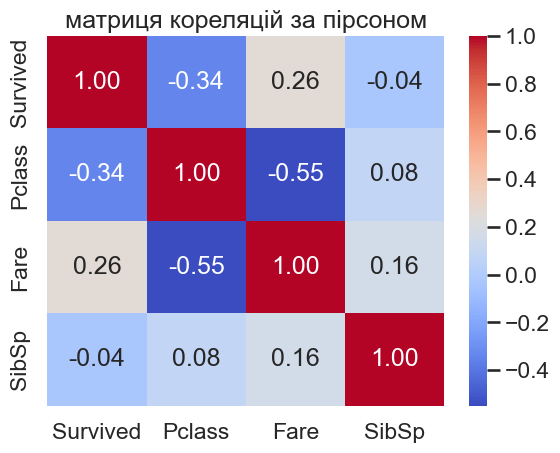

In [11]:
columns_for_matrix = dataset[['Survived','Pclass', 'Fare', 'SibSp']]

matrix = columns_for_matrix.corr(method="pearson")

sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('матриця кореляцій за пірсоном')
plt.show()



Ваші висновки:

дані корелюють. найбільше корелюють Pclass та Fare (що логічно... типу чим крутіший клас тим дорожче). Також значно корелюють Pclass та survived (бідні не виживають:с ) те саме можна сказати про кореляцію між fare та survived з аналогічним висновком.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [28]:
def fulldataset(dataset, column, groups):
    dataset[column] = dataset.groupby(groups)[column].transform(lambda x: x.fillna(x.median()))
    return dataset

test_dataset = fulldataset(dataset, "Age", ["Survived"])
print(test_dataset.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

тепер у нас заповнені дані у полі age. Прикольно.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





C:\Users\User\AppData\Local\Temp\ipykernel_16788\3241423350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_for_category_age.at[index, 'Category_Age'] = 1


      Age  Category_Age
0    22.0           1.0
1    38.0           2.0
2    26.0           1.0
3    35.0           2.0
4    35.0           2.0
..    ...           ...
886  27.0           1.0
887  19.0           1.0
888   NaN           4.0
889  26.0           1.0
890  32.0           1.0

[891 rows x 2 columns]


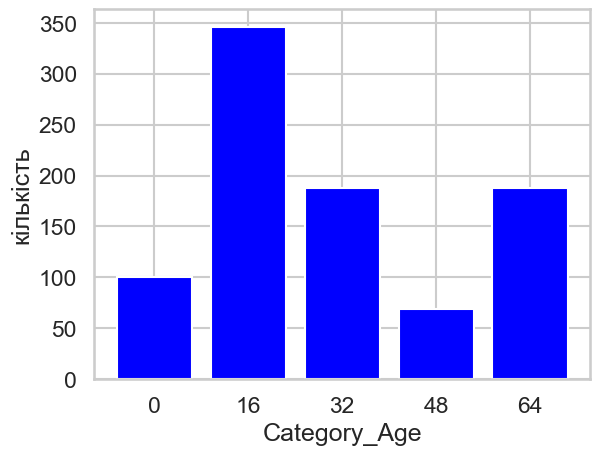

In [6]:
columns_for_category_age = dataset[['Age']]
for index, row in columns_for_category_age.iterrows():
    age = row['Age']
    if age <= 16:
        columns_for_category_age.at[index, 'Category_Age'] = 0
    elif age <= 32:
        columns_for_category_age.at[index, 'Category_Age'] = 1
    elif age <= 48:
        columns_for_category_age.at[index, 'Category_Age'] = 2
    elif age <= 64:
        columns_for_category_age.at[index, 'Category_Age'] = 3
    else:
        columns_for_category_age.at[index, 'Category_Age'] = 4

print(columns_for_category_age)

category_counts = columns_for_category_age['Category_Age'].value_counts().sort_index()
category_names = ['0', '16', '32', '48', '64']

plt.bar(category_names, category_counts, color='blue')
plt.xlabel('Category_Age')
plt.ylabel('кількість')
plt.show()

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

Ваші висновки:

висновки до 5 завдання. Ми переробили неперервні дані в категоріальні. бачимо що найбільше людей віком 16-32 а найменше 48 - 64.

Fare_Category
3    129
2    101
1     68
0     44
Name: count, dtype: int64


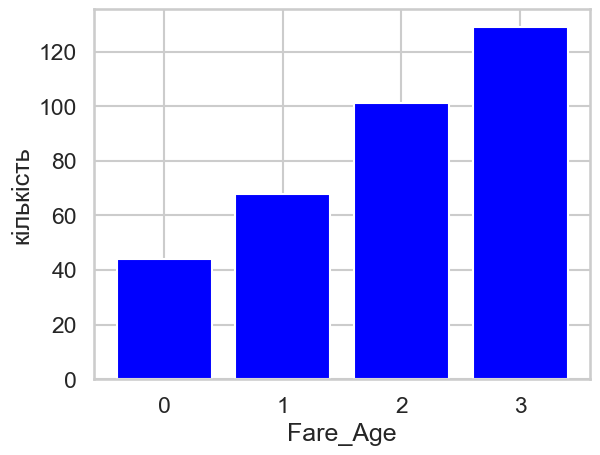

In [7]:
newdataset = dataset
newdataset['Fare_Category'] = pd.qcut(dataset['Fare'], q=4, labels=False)


Survived_by_fare = dataset[dataset['Survived'] == 1]
print(Survived_by_fare['Fare_Category'].value_counts())


category_counts = Survived_by_fare['Fare_Category'].value_counts().sort_index()
category_names = ['0', '1', '2', '3']

plt.bar(category_names, category_counts, color='blue')
plt.xlabel('Fare_Age')
plt.ylabel('кількість')
plt.show()

Ваші висновки:

висновки схожі до висновків з матриці кореляцій: бідні вмирають. А точніше що серед виживших, людей які заплати більшу ціну за білет є більше ніж тих що заплатили меншу ціну

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [10]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']


def is_alone(size):
    if size == 0:
        return 0  
    else:
        return 1

dataset['Alone'] = dataset['Family_size'].apply(is_alone)

with_family_count = dataset[dataset['Alone'] == 0]['Alone'].count()
without_family_count = dataset[dataset['Alone'] == 1]['Alone'].count()


corr_matrix = dataset[['Alone', 'Survived']].corr()


print(corr_matrix)


             Alone  Survived
Alone     1.000000  0.203367
Survived  0.203367  1.000000


Ваші висновки:

дані корелюють. якщо пасажир мав сімю він мав вищі шанси вижити. скоріш за все це тому що всі діти на борту мали сімю (бо дітей зазвичай самих плавати через океан не пускають) а дітей в першу чергу пускали на рятувальні човни. Жінки теж були в пріорітеті, а оскільки жінок теж не пускали зазвичай самих на корабель (мабуть) то вони теж мали сімю.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [6]:
dataset.drop(columns=["Cabin", "Name" ])

Ваші висновки:

видалиі cabin через такі причини:
1) багато втрачених даних
2) а нашо воно?

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [7]:
Sex_mapping = {'male': 0, 'female': 1}
dataset['Sex'] = dataset['Sex'].map(Sex_mapping)

Embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)


Ваші висновки:

перетворив. тепер можна робити всяку математику(кореляції і тд).

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



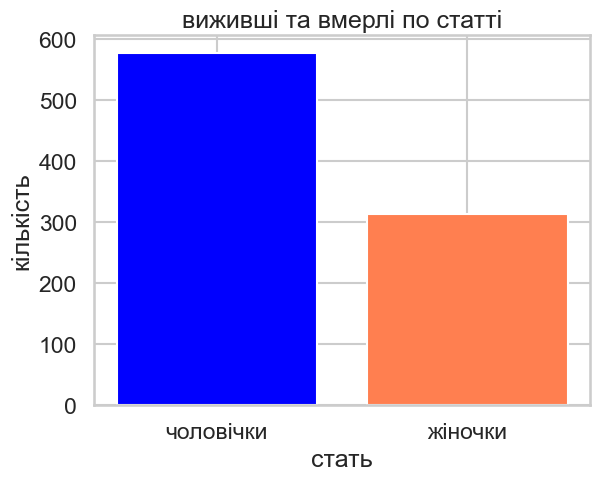

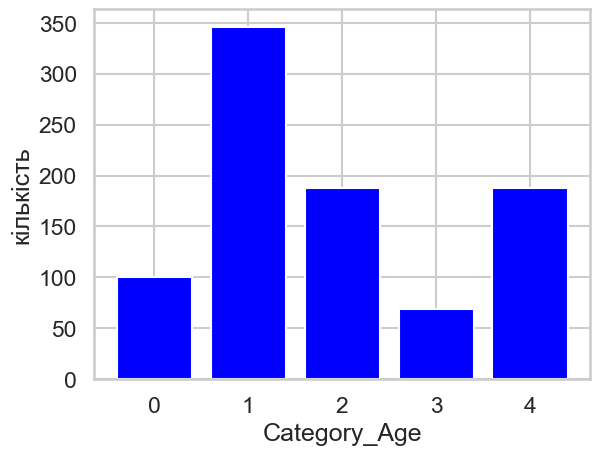

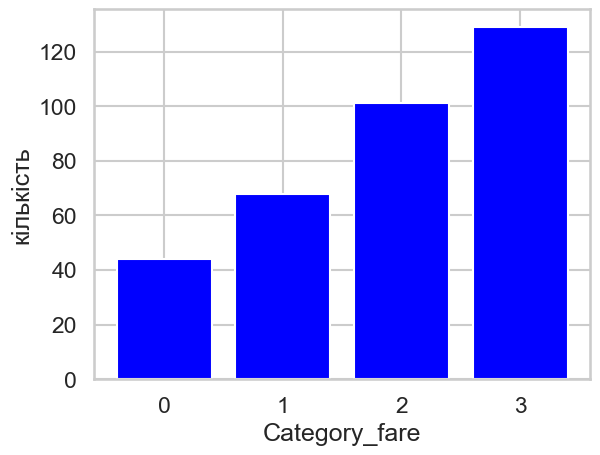

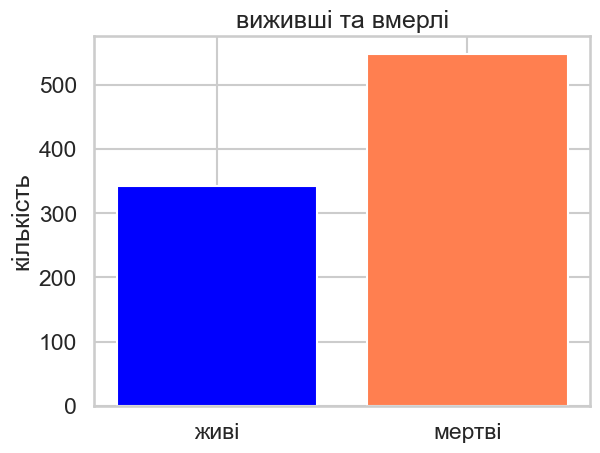

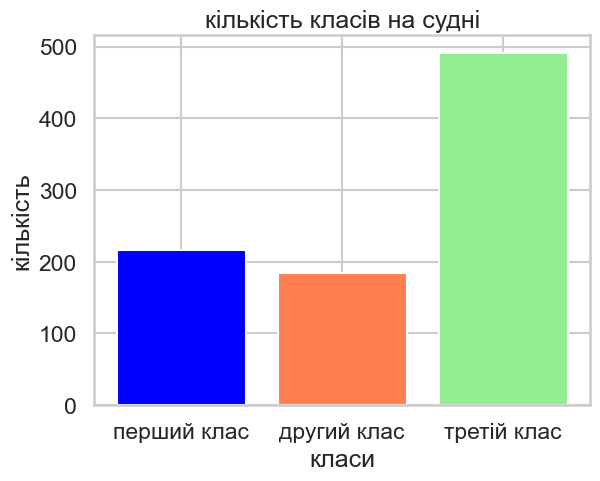

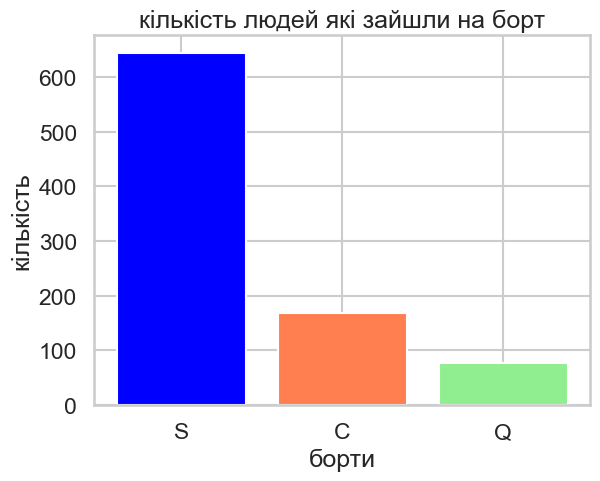

In [14]:
sex_and_survived_columns = dataset[['Sex', 'Survived']]
only_male = sex_and_survived_columns[sex_and_survived_columns['Sex'] == 'male']
only_female = sex_and_survived_columns[sex_and_survived_columns['Sex'] == 'female']
categories = ['чоловічки', 'жіночки', ]

values = [only_male.shape[0], only_female.shape[0]]

plt.bar(categories, values, color=['blue', 'coral', 'blue', 'coral'])
plt.title('виживші та вмерлі по статті')
plt.xlabel('стать')
plt.ylabel('кількість')

plt.show()




category_counts = columns_for_category_age['Category_Age'].value_counts().sort_index()
category_names = ['0', '1', '2', '3', '4']

plt.bar(category_names, category_counts, color='blue')
plt.xlabel('Category_Age')
plt.ylabel('кількість')
plt.show()





category_counts = Survived_by_fare['Fare_Category'].value_counts().sort_index()
category_names = ['0', '1', '2', '3']

plt.bar(category_names, category_counts, color='blue')
plt.xlabel('Category_fare')
plt.ylabel('кількість')
plt.show()






survived_columns = dataset[['Survived']]
survived = survived_columns[survived_columns['Survived'] == 1]
dead = survived_columns[survived_columns['Survived'] == 0]
categories = ['живі', 'мертві', ]

values = [survived.shape[0], dead.shape[0]]

plt.bar(categories, values, color=['blue', 'coral'])
plt.title('виживші та вмерлі')
plt.xlabel('')
plt.ylabel('кількість')

plt.show()














pclass_and_surv_column = dataset[['Pclass', 'Survived']]
first_class = pclass_and_surv_column[pclass_and_surv_column['Pclass'] == 1].shape[0]
second_class = pclass_and_surv_column[pclass_and_surv_column['Pclass'] == 2].shape[0]
thirt_class = pclass_and_surv_column[pclass_and_surv_column['Pclass'] == 3].shape[0]
categories = ['перший клас', 'другий клас', 'третій клас']

values = [first_class, second_class, thirt_class]

plt.bar(categories, values, color=['blue', 'coral', 'lightgreen'])
plt.title('кількість класів на судні')
plt.xlabel('класи')
plt.ylabel('кількість')

plt.show()






embarked_S = dataset[dataset['Embarked'] == "S"]
embarked_C = dataset[dataset['Embarked'] == "C"]
embarked_Q = dataset[dataset['Embarked'] == "Q"]

# графік 1

categories = ['S', 'C', 'Q']

values = [embarked_S.shape[0], embarked_C.shape[0], embarked_Q.shape[0]]

plt.bar(categories, values, color=['blue', 'coral', 'lightgreen'])
plt.title('кількість людей які зайшли на борт')
plt.xlabel('борти')
plt.ylabel('кількість')

plt.show()

Ваші висновки:

це категоріальні змінні. На графіках продемонстрована різна інформація. Поняття не маю які ще висновки від мене очікуються :(

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

<Axes: xlabel='Fare', ylabel='Count'>

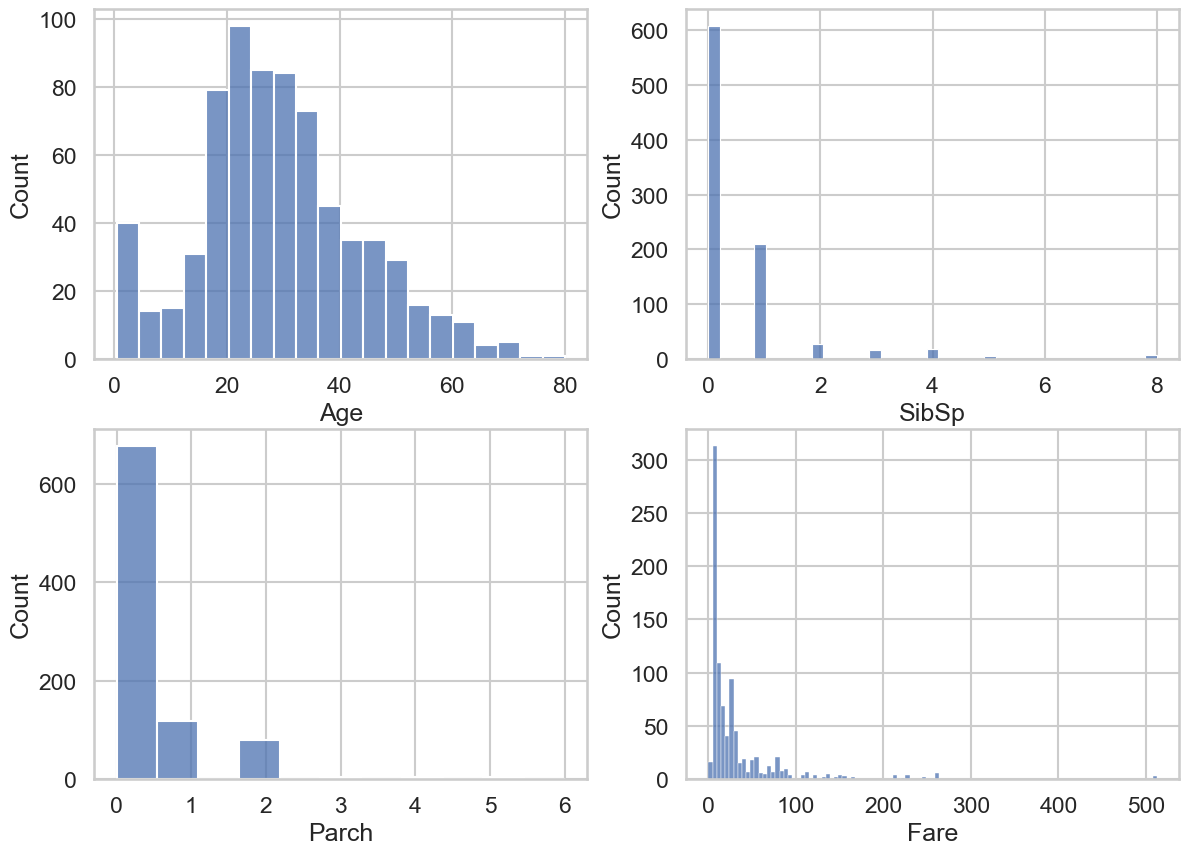

In [13]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data = dataset, x = 'Age',  ax = ax1)
sns.histplot(data = dataset, x = 'SibSp', ax = ax2)
sns.histplot(data = dataset, x = 'Parch', ax = ax3)
sns.histplot(data = dataset, x = 'Fare', ax = ax4)


Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

In [ ]:
#code

Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.